In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_circles

In [2]:
x, y = make_circles(n_samples=300, noise=0.1, factor=0.5, random_state=0)

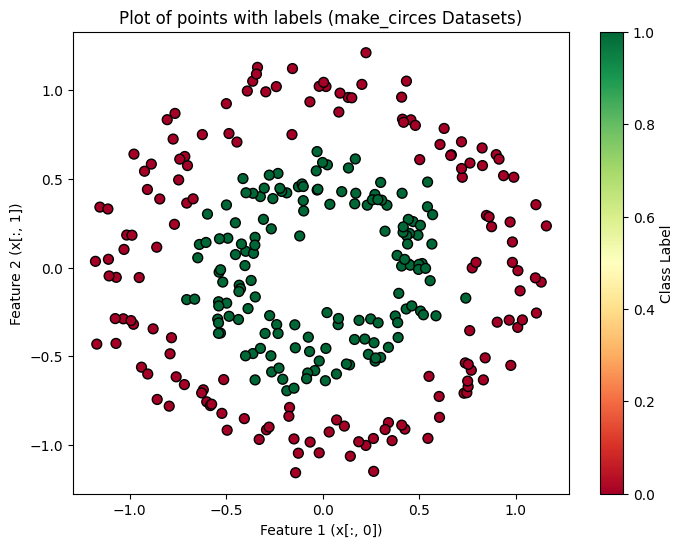

In [3]:
plt.figure(figsize=(8, 6))
plt.scatter(x[:, 0], x[:, 1], c=y, cmap=plt.cm.RdYlGn, edgecolors='k', marker='o', s=50)
plt.xlabel('Feature 1 (x[:, 0])')
plt.ylabel('Feature 2 (x[:, 1])')
plt.title('Plot of points with labels (make_circes Datasets)')
plt.colorbar(label='Class Label')
plt.show()

In [4]:
from sklearn.neural_network import MLPClassifier
import ipywidgets as widgets
from ipywidgets import interactive
from IPython.display import display

In [9]:
def update_plot(hidden_layer_size):
    clf = MLPClassifier(hidden_layer_sizes=(hidden_layer_size, ), activation='relu', max_iter=3000, random_state=1)
    clf.fit(x, y)
    
    x_vals = np.linspace(x[:, 0].min() - 0.1, x[:, 0].max() + 0.1, 100)
    y_vals = np.linspace(x[:, 1].min() - 0.1, x[:, 1].max() + 0.1, 100)
    
    x_plane, y_plane = np.meshgrid(x_vals, y_vals)
    
    grid_points = np.column_stack((x_plane.ravel(), y_plane.ravel()))
    
    z = clf.predict(grid_points)
    z = z.reshape(x_plane.shape)
    
    y_pred = clf.predict(x)
    
    plt.clf()
    
    plt.contourf(x_plane, y_plane, z, levels=[-0.5, 0.5, 1.5], cmap=plt.cm.RdYlGn, alpha=0.6)
    
    class_0 = y_pred == 0
    class_1 = y_pred == 1
    
    plt.scatter(x[class_0, 0], x[class_0, 1], c='red', edgecolors='k', marker='o', s=50, label='Predicted Class 0')
    plt.scatter(x[class_1, 0], x[class_1, 1], c='green', edgecolors='k', marker='o', s=50, label='Predicted Class 1')
    
    plt.xlabel('Feature 1')
    plt.ylabel('Feature 2')
    plt.title(f'Decision Boundary and Predicted Labels (Hidden Layer Size={hidden_layer_size})')
    plt.legend()
    plt.show()

In [ ]:
hidden_layer_size_slider = widgets.IntSlider(value=1, min=1, max=10, step=1, description='Hidden Layer Size')

interactive_plot = interactive(update_plot, hidden_layer_size = hidden_layer_size_slider)

display(interactive_plot)

interactive(children=(IntSlider(value=1, description='Hidden Layer Size', max=10, min=1), Output()), _dom_clas…